In [1]:
# this is copied from tile.c and made a Python list
from minihack.tiles import GlyphMapper
gm = GlyphMapper()

PATH DAT DIR =  /Users/samvelyan/workspace/minihack_new/minihack/dat
LIB_DIR /Users/samvelyan/workspace/minihack_new/minihack/lib
PATCH_SCRIPT /Users/samvelyan/workspace/minihack_new/minihack/scripts/mh_patch_nhdat.sh
HACKDIR /Users/samvelyan/anaconda3/envs/minihack/lib/python3.8/site-packages/nle/nethackdir


In [2]:
import IPython.display
import PIL.Image

def display(x):
    IPython.display.display(PIL.Image.fromarray(x))
    
display(gm.glyph_id_to_rgb(270)) # oracle
display(gm.glyph_id_to_rgb(1)) # killer bee 

In [3]:
# More reliable test
# Creating custom MiniHack task with many objects

from minihack import MiniHackSkill, LevelGenerator

class MiniHackGUITest(MiniHackSkill):
    """Environment for "eat" task."""

    def __init__(self, *args, obs_crop_h=5, obs_crop_w=5, **kwargs):
        lvl_gen = LevelGenerator(w=5, h=5, lit=True)
        lvl_gen.add_stair_up((2, 2))

        lvl_gen.add_object("apple", "%", place=(0, 0))
        lvl_gen.add_object("pear", "%", place=(0, 1))
        lvl_gen.add_object("dagger", ")", place=(0, 2))
        lvl_gen.add_object("robe", "[", place=(0, 3))
        lvl_gen.add_object("boulder", "`", place=(0, 4))

        lvl_gen.add_terrain((1, 0), "W")  # water
        lvl_gen.add_terrain((1, 1), "L")  # lava
        lvl_gen.add_terrain((1, 2), "T")  # tree
        lvl_gen.add_terrain((1, 3), "{")  # fountain
        lvl_gen.add_terrain((1, 4), "F")  # iron bars

        lvl_gen.add_terrain((4, 0), "|")
        lvl_gen.add_terrain((4, 1), "|")
        lvl_gen.add_terrain((4, 2), "|")
        lvl_gen.add_terrain((4, 3), "|")
        lvl_gen.add_terrain((4, 4), "|")
        lvl_gen.add_door("open", place=(4, 1))
        lvl_gen.add_door("closed", place=(4, 3))

        lvl_gen.add_monster("killer bee", place=(3, 0))
        lvl_gen.add_monster("oracle", place=(3, 1))
        lvl_gen.add_monster("famine", place=(3, 2))
        lvl_gen.add_monster("giant ant", place=(3, 3))
        lvl_gen.add_monster("black dragon", place=(3, 4))

        des_file = lvl_gen.get_des()
        print(des_file)

        kwargs["observation_keys"] = (
            "glyphs_crop",
            "screen_descriptions_crop",
            "pixel_crop",
            "pixel",
        )

        super().__init__(*args, des_file=des_file, **kwargs)


In [4]:
env = MiniHackGUITest(savedir=None,archivefile=None)
obs = env.reset()

# Glyphs
glyphs = obs["glyphs_crop"]

# Textual descriptions
screen_description = obs["screen_descriptions_crop"]

env.render(mode="human")


MAZE: "mylevel", ' '
FLAGS:hardfloor
MESSAGE: "Welcome to MiniHack!"
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
.W..|
.L..|
.T..|
.{..|
.F..|
ENDMAP
REGION:(0,0,5,5),lit,"ordinary"
BRANCH:(2,2,2,2),(1,1,1,1)
OBJECT:('%',"apple"),(0, 0)
OBJECT:('%',"pear"),(0, 1)
OBJECT:(')',"dagger"),(0, 2)
OBJECT:('[',"robe"),(0, 3)
OBJECT:('`',"boulder"),(0, 4)
DOOR:open,(4, 1)
DOOR:closed,(4, 3)
MONSTER:"killer bee",(3, 0)
MONSTER:"oracle",(3, 1)
MONSTER:"famine",(3, 2)
MONSTER:"giant ant",(3, 3)
MONSTER:"black dragon",(3, 4)


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                  

In [5]:
print(glyphs)
for i in range(glyphs.shape[0]):
    for j in range(glyphs.shape[1]):
        glyph = glyphs[j,i]
        display(gm.glyph_id_to_rgb(glyph))
        name = screen_description[j, i].tobytes().decode("utf-8")
        print(name, f"({glyph})", "\n----------------")

[[2158 2400 2378    1 2360]
 [2160 2393 2378  270 2372]
 [5976 2377  329  310 2360]
 [2028 2390 2378    0 2374]
 [2353 2376 2378  146 2360]]


  an apple                                                                           (2158) 
----------------


  a pear                                                                             (2160) 
----------------


                                                                                     (5976) 
----------------


  a robe                                                                             (2028) 
----------------


  a boulder                                                                          (2353) 
----------------


  water                                                                              (2400) 
----------------


  molten lava                                                                        (2393) 
----------------


  tree                                                                               (2377) 
----------------


  fountain                                                                           (2390) 
----------------


  iron bars                                                                          (2376) 
----------------


  floor of a room                                                                    (2378) 
----------------


  floor of a room                                                                    (2378) 
----------------


  human caveman called Agent                                                         (329) 
----------------


  floor of a room                                                                    (2378) 
----------------


  floor of a room                                                                    (2378) 
----------------


  killer bee                                                                         (1) 
----------------


  peaceful Oracle                                                                    (270) 
----------------


  Famine                                                                             (310) 
----------------


  giant ant                                                                          (0) 
----------------


  black dragon                                                                       (146) 
----------------


  wall                                                                               (2360) 
----------------


  open door                                                                          (2372) 
----------------


  wall                                                                               (2360) 
----------------


  closed door                                                                        (2374) 
----------------


  wall                                                                               (2360) 
----------------


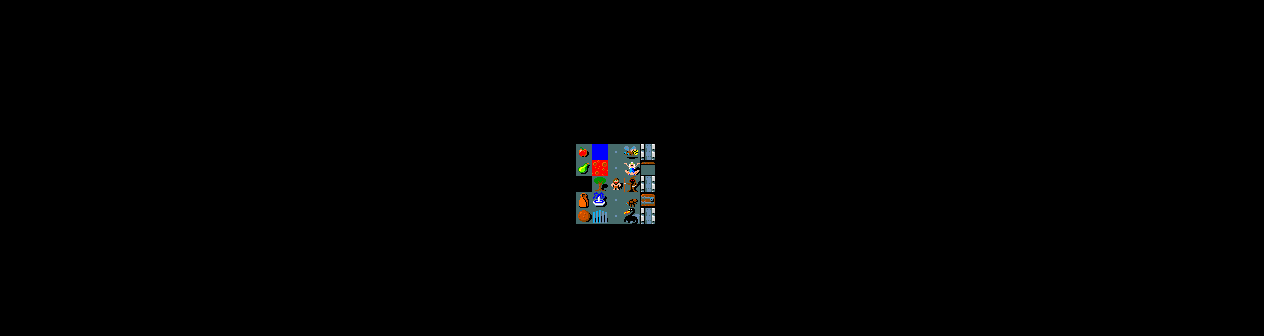

In [6]:
display(obs["pixel"])

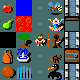

In [7]:
display(obs["pixel_crop"])

In [9]:
from minihack.envs.hidenseek import MiniHackHideAndSeek
from minihack.envs.mazewalk import *
observation_keys = (
    "glyphs_crop",
    "screen_descriptions_crop",
     "pixel_crop",
     "pixel",
)

env = MiniHackMazeWalk45x19Premapped(savedir=None,archivefile=None,observation_keys=observation_keys)
obs = env.reset()

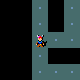

In [10]:
display(obs["pixel_crop"])

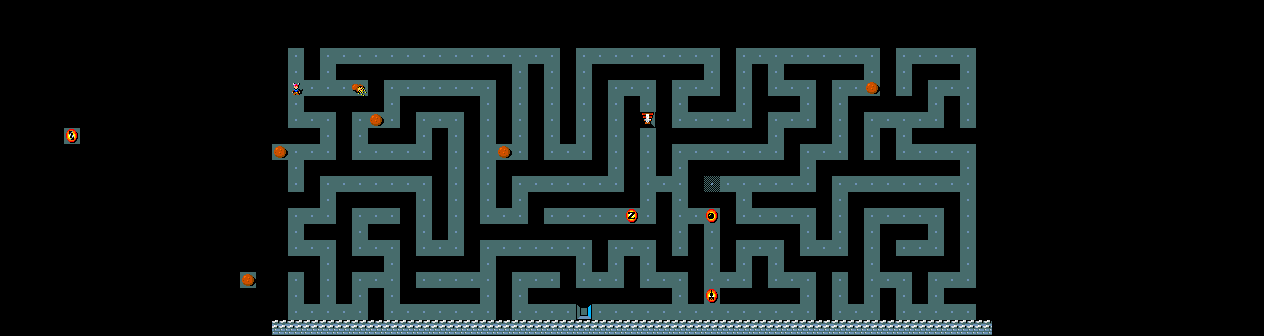

In [11]:
display(obs["pixel"])